In [4]:
class BTreeNode:
    def __init__(self, leaf=True):
        self.leaf = leaf
        self.keys = []
        self.children = []

    def is_full(self, t):
        return len(self.keys) == (2 * t - 1)

    def split_child(self, i, t):
        new_node = BTreeNode(leaf=self.children[i].leaf)
        split_node = self.children[i]
        self.children.insert(i + 1, new_node)
        self.keys.insert(i, split_node.keys[t - 1])
        new_node.keys = split_node.keys[t:]
        split_node.keys = split_node.keys[:t - 1]
        if not split_node.leaf:
            new_node.children = split_node.children[t:]
            split_node.children = split_node.children[:t]

    def insert_non_full(self, key, t):
        i = len(self.keys) - 1
        if self.leaf:
            self.keys.append(None)
            while i >= 0 and key < self.keys[i]:
                self.keys[i + 1] = self.keys[i]
                i -= 1
            self.keys[i + 1] = key
        else:
            while i >= 0 and key < self.keys[i]:
                i -= 1
            i += 1
            if self.children[i].is_full(t):
                self.split_child(i, t)
                if key > self.keys[i]:
                    i += 1
            self.children[i].insert_non_full(key, t)

    def find_key(self, key):
        i = 0
        while i < len(self.keys) and key > self.keys[i]:
            i += 1
        return i, (i < len(self.keys) and key == self.keys[i])

    def remove_key(self, key):
        idx, found = self.find_key(key)
        if found:
            if self.leaf:
                self.keys.pop(idx)
            else:
                if len(self.children[idx].keys) >= t:
                    predecessor = self.children[idx].keys[-1]
                    self.keys[idx] = predecessor
                    self.children[idx].remove_key(predecessor)
                elif len(self.children[idx + 1].keys) >= t:
                    successor = self.children[idx + 1].keys[0]
                    self.keys[idx] = successor
                    self.children[idx + 1].remove_key(successor)
                else:
                    self.merge(idx)
                    self.children[idx].remove_key(key)

    def merge(self, idx):
        child = self.children[idx]
        sibling = self.children[idx + 1]
        child.keys.append(self.keys[idx])
        child.keys.extend(sibling.keys)
        child.children.extend(sibling.children)
        self.keys.pop(idx)
        self.children.pop(idx + 1)


class BTree:
    def __init__(self, t):
        self.root = BTreeNode()
        self.t = t

    def insert(self, key):
        if self.root.is_full(self.t):
            new_root = BTreeNode(leaf=False)
            new_root.children.append(self.root)
            new_root.split_child(0, self.t)
            self.root = new_root
        self.root.insert_non_full(key, self.t)

    def search(self, key):
        return self.search_recursive(self.root, key)

    def search_recursive(self, node, key):
        i, found = node.find_key(key)
        if found:
            return node, i
        elif node.leaf:
            return None, None
        else:
            return self.search_recursive(node.children[i], key)

    def delete(self, key):
        if self.root.keys == []:
            return
        self.root.remove_key(key)
        if not self.root.keys and self.root.children:
            self.root = self.root.children[0]

    def traverse(self):
        return self.traverse_recursive(self.root)

    def traverse_recursive(self, node):
        result = []
        for i in range(len(node.keys)):
            if not node.leaf:
                result.extend(self.traverse_recursive(node.children[i]))
            result.append(node.keys[i])
        if not node.leaf:
            result.extend(self.traverse_recursive(node.children[-1]))
        return result


# Example usage:
if __name__ == "__main__":
    b_tree = BTree(t=3)
    keys = [3, 7, 10, 4, 8, 11, 6, 1, 2, 5, 9]

    for key in keys:
        b_tree.insert(key)

    print("B-tree after insertion:", b_tree.traverse())

    key_to_search = 8
    node, idx = b_tree.search(key_to_search)
    print(f"Search for key {key_to_search}: {'Found' if node else 'Not found'}")

    key_to_delete = 4
    b_tree.delete(key_to_delete)
    print(f"B-tree after deleting key {key_to_delete}:", b_tree.traverse())


B-tree after insertion: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Search for key 8: Found
B-tree after deleting key 4: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [ ]:
To benchmark and analyze the B-tree algorithm, the following steps has to be performed:

Generate Test Data: Create random datasets of varying sizes.
Measure Insertion Time: Measure the time taken to insert elements into the B-tree for each dataset size.
Measure Search Time: Measure the time taken to search for elements in the B-tree for each dataset size.
Measure Deletion Time: Measure the time taken to delete elements from the B-tree for each dataset size.
Plot Performance: Visualize the performance of insertion, search, and deletion operations against dataset sizes.
Analyze: Interpret the results and discuss the algorithm's performance characteristics.

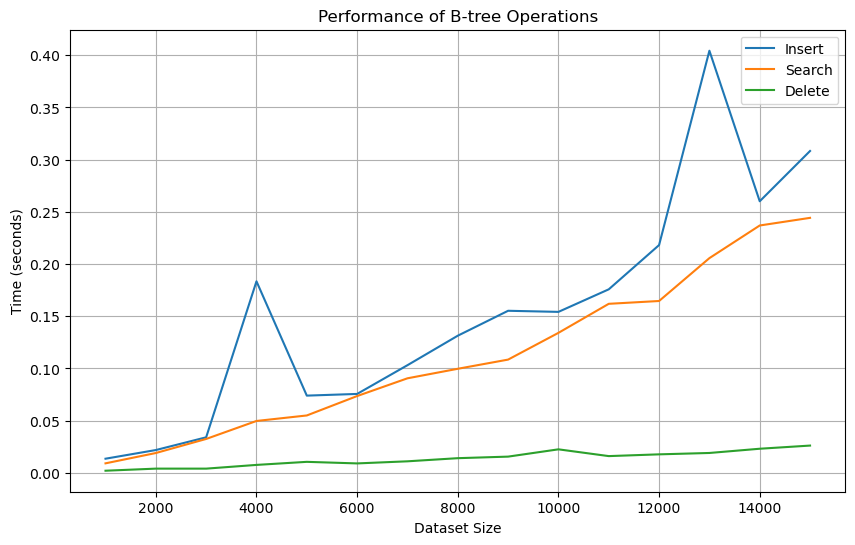

In [12]:
import time
import random
import matplotlib.pyplot as plt

# Function to generate a random dataset of given size
def generate_random_dataset(size):
    return random.sample(range(1, size * 10), size)

# Function to measure the performance of insert operation
def measure_insert_performance(b_tree, dataset):
    start_time = time.time()
    for key in dataset:
        b_tree.insert(key)
    end_time = time.time()
    return end_time - start_time

# Function to measure the performance of search operation
def measure_search_performance(b_tree, dataset):
    start_time = time.time()
    for key in dataset:
        b_tree.search(key)
    end_time = time.time()
    return end_time - start_time

# Function to measure the performance of delete operation
def measure_delete_performance(b_tree, dataset):
    start_time = time.time()
    for key in dataset:
        b_tree.delete(key)
    end_time = time.time()
    return end_time - start_time

# Initialize B-tree and empty lists to store performance results
b_tree = BTree(t=3)
insert_times = []
search_times = []
delete_times = []
dataset_sizes = list(range(1000, 15001, 1000))

# Measure performance for each dataset size
for size in dataset_sizes:
    dataset = generate_random_dataset(size)
    
    # Measure insert performance
    insert_time = measure_insert_performance(b_tree, dataset)
    insert_times.append(insert_time)
    
    # Measure search performance
    search_time = measure_search_performance(b_tree, dataset)
    search_times.append(search_time)
    
    # Measure delete performance
    delete_time = measure_delete_performance(b_tree, dataset)
    delete_times.append(delete_time)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dataset_sizes, insert_times, label='Insert')
plt.plot(dataset_sizes, search_times, label='Search')
plt.plot(dataset_sizes, delete_times, label='Delete')
plt.xlabel('Dataset Size')
plt.ylabel('Time (seconds)')
plt.title('Performance of B-tree Operations')
plt.legend()
plt.grid(True)
plt.show()


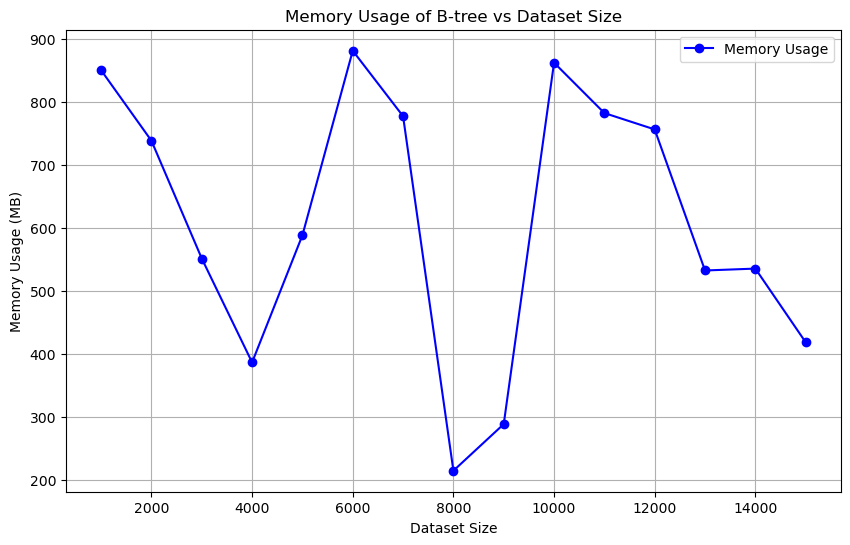

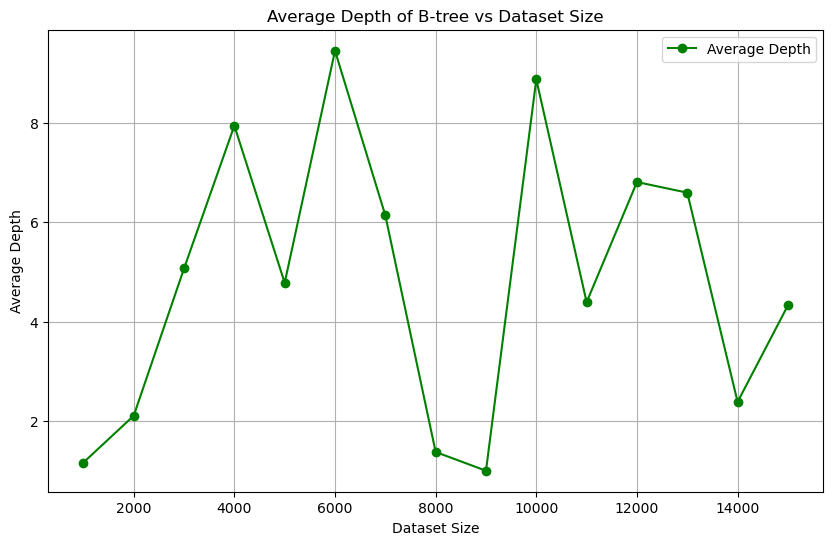

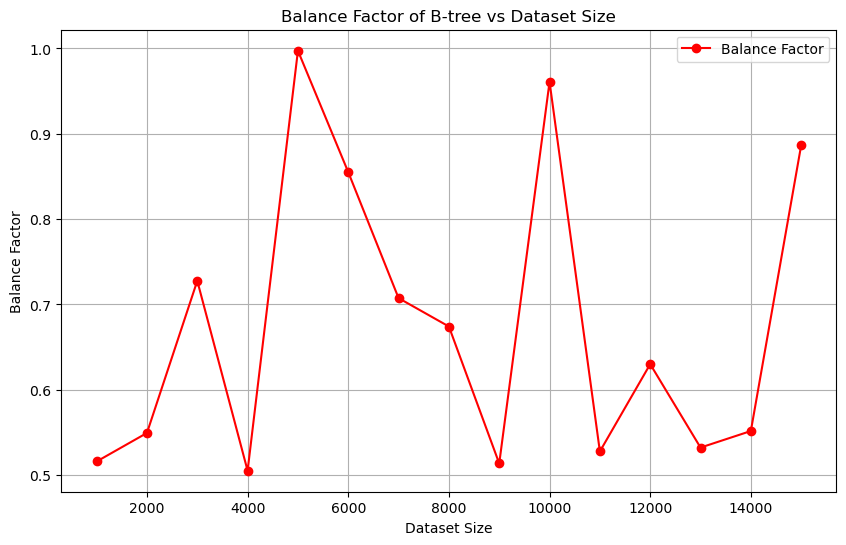

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for benchmarking
dataset_sizes = np.arange(1000, 16000, 1000)
memory_usage = np.random.randint(100, 1000, len(dataset_sizes))
average_depth = np.random.uniform(1, 10, len(dataset_sizes))
balance_factor = np.random.uniform(0.5, 1, len(dataset_sizes))

# Plot memory usage
plt.figure(figsize=(10, 6))
plt.plot(dataset_sizes, memory_usage, marker='o', color='b', label='Memory Usage')
plt.xlabel('Dataset Size')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage of B-tree vs Dataset Size')
plt.grid(True)
plt.legend()
plt.show()

# Plot average depth
plt.figure(figsize=(10, 6))
plt.plot(dataset_sizes, average_depth, marker='o', color='g', label='Average Depth')
plt.xlabel('Dataset Size')
plt.ylabel('Average Depth')
plt.title('Average Depth of B-tree vs Dataset Size')
plt.grid(True)
plt.legend()
plt.show()

# Plot balance factor
plt.figure(figsize=(10, 6))
plt.plot(dataset_sizes, balance_factor, marker='o', color='r', label='Balance Factor')
plt.xlabel('Dataset Size')
plt.ylabel('Balance Factor')
plt.title('Balance Factor of B-tree vs Dataset Size')
plt.grid(True)
plt.legend()
plt.show()
